In [1]:
import pickle
import json
import requests
import pandas as pd
from riotwatcher import LolWatcher, ApiError
import numpy as np
import matplotlib.pyplot as plt
# from time import sleep

"""with open('data/api-key.txt', 'r') as api:
    API_KEY = api.read()
lol_watcher = LolWatcher(API_KEY)

HEADERS = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4)"+
                    " AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135"+
                    " Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
    "Origin": "https://developer.riotgames.com",
    "X-Riot-Token": API_KEY
}"""

CHAMP_ID = 64
TESTMATCH = "4748107995"


In [2]:
import os
import datetime

#import IPython
#import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [3]:
dfs_dict = pickle.load(open("data/timeline-di.p", "rb"))

In [4]:
gameids = list(dfs_dict.keys())
gameids.sort()
train_ids = gameids[0:int(len(gameids)*.8)]
val_ids = gameids[int(len(gameids)*.8):int(len(gameids)*.9)]
test_ids = gameids[int(len(gameids)*.9):]

In [5]:
dfs_dict[train_ids[1]][0:10]

,timestamp,0currentGold,1currentGold,2currentGold,3currentGold,4currentGold,5currentGold,6currentGold,7currentGold,8currentGold,...,1y,2y,3y,4y,6y,7y,8y,9y,player_x,player_y
0,0.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,361.0,293.0,471.0,649.0,14291.0,14223.0,14401.0,14579.0,14486.0,14511.0
1,60021.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,...,5918.0,7122.0,1061.0,5697.0,6837.0,6371.0,4256.0,5165.0,13192.0,14166.0
2,120038.0,126.0,194.0,98.0,63.0,44.0,42.0,121.0,98.0,98.0,...,2128.0,6876.0,2722.0,2688.0,7753.0,7563.0,3038.0,2617.0,4234.0,13602.0
3,180049.0,455.0,453.0,469.0,614.0,134.0,311.0,138.0,381.0,171.0,...,5054.0,6181.0,4045.0,3444.0,5250.0,7136.0,5056.0,7300.0,3871.0,13475.0
4,240068.0,781.0,947.0,717.0,1358.0,339.0,560.0,261.0,79.0,46.0,...,5411.0,7268.0,2113.0,2290.0,13996.0,8934.0,8532.0,2420.0,4153.0,13654.0
5,300080.0,87.0,1232.0,176.0,1830.0,558.0,144.0,526.0,495.0,297.0,...,8268.0,6871.0,1171.0,1372.0,9862.0,7741.0,1260.0,1687.0,4254.0,13656.0
6,360102.0,418.0,1314.0,587.0,965.0,793.0,728.0,821.0,859.0,533.0,...,13841.0,13390.0,520.0,1237.0,4689.0,5565.0,1573.0,1547.0,4405.0,14040.0
7,420109.0,59.0,346.0,257.0,331.0,192.0,492.0,48.0,49.0,83.0,...,3688.0,7655.0,2539.0,2698.0,13300.0,11346.0,2695.0,3577.0,3241.0,13286.0
8,480142.0,383.0,802.0,688.0,840.0,430.0,921.0,482.0,429.0,344.0,...,5488.0,5054.0,4249.0,5181.0,10001.0,7477.0,5826.0,5571.0,2137.0,11848.0
9,540170.0,781.0,1284.0,961.0,1409.0,707.0,1177.0,643.0,55.0,545.0,...,7369.0,6941.0,4785.0,7242.0,7701.0,8166.0,7717.0,7742.0,4345.0,13525.0


In [6]:
#train_ids[0]
test0 = dfs_dict[train_ids[0]][0:20].drop(["timestamp"],axis=1)
test1 = dfs_dict[train_ids[1]][0:20].drop(["timestamp"],axis=1)
column_indices = {name: i for i, name in enumerate(test0.columns)}

In [7]:
test0

,0currentGold,1currentGold,2currentGold,3currentGold,4currentGold,5currentGold,6currentGold,7currentGold,8currentGold,9currentGold,...,1y,3y,4y,5y,6y,7y,8y,9y,player_x,player_y
0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,361.0,471.0,649.0,14511.0,14291.0,14223.0,14401.0,14579.0,351.0,293.0
1,25.0,420.0,25.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,...,542.0,1013.0,679.0,13885.0,11463.0,8416.0,7493.0,11457.0,6348.0,9817.0
2,122.0,190.0,115.0,122.0,68.0,41.0,144.0,125.0,83.0,22.0,...,8042.0,2285.0,2107.0,12344.0,10103.0,7015.0,3101.0,2597.0,6598.0,6970.0
3,356.0,634.0,486.0,521.0,276.0,359.0,540.0,380.0,373.0,198.0,...,5011.0,3118.0,3266.0,13855.0,4991.0,7337.0,3991.0,4151.0,7235.0,6689.0
4,128.0,1475.0,128.0,750.0,485.0,816.0,99.0,89.0,648.0,94.0,...,3263.0,2921.0,2816.0,10840.0,9761.0,9040.0,3937.0,11836.0,7473.0,7689.0
5,453.0,212.0,454.0,57.0,80.0,264.0,413.0,379.0,1050.0,228.0,...,7169.0,1556.0,1712.0,12890.0,8567.0,8337.0,3373.0,3711.0,8044.0,7598.0
6,803.0,630.0,751.0,439.0,214.0,527.0,696.0,750.0,273.0,429.0,...,12602.0,1340.0,4032.0,13411.0,4964.0,7590.0,2309.0,5108.0,6946.0,7036.0
7,1316.0,1366.0,37.0,23.0,534.0,817.0,198.0,74.0,224.0,29.0,...,5325.0,554.0,5437.0,12869.0,11326.0,8390.0,4371.0,12836.0,2871.0,2268.0
8,89.0,231.0,361.0,323.0,119.0,308.0,946.0,1129.0,674.0,238.0,...,10843.0,2752.0,5456.0,8475.0,10091.0,9822.0,5626.0,9909.0,7742.0,7255.0
9,367.0,395.0,1114.0,968.0,607.0,557.0,75.0,57.0,954.0,195.0,...,2446.0,3844.0,3924.0,13650.0,8741.0,13681.0,4822.0,4766.0,8023.0,7885.0


In [8]:
test0.columns

Index(['0currentGold', '1currentGold', '2currentGold', '3currentGold',
       '4currentGold', '5currentGold', '6currentGold', '7currentGold',
       '8currentGold', '9currentGold', '0totalGold', '1totalGold',
       '2totalGold', '3totalGold', '4totalGold', '5totalGold', '6totalGold',
       '7totalGold', '8totalGold', '9totalGold', '0level', '1level', '2level',
       '3level', '4level', '5level', '6level', '7level', '8level', '9level',
       '0jungleMinionsKilled', '1jungleMinionsKilled', '2jungleMinionsKilled',
       '3jungleMinionsKilled', '4jungleMinionsKilled', '5jungleMinionsKilled',
       '6jungleMinionsKilled', '7jungleMinionsKilled', '8jungleMinionsKilled',
       '9jungleMinionsKilled', '0x', '1x', '3x', '4x', '5x', '6x', '7x', '8x',
       '9x', '0y', '1y', '3y', '4y', '5y', '6y', '7y', '8y', '9y', 'player_x',
       'player_y'],
      dtype='object')

In [9]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                 full_df=test0, val_df = test1,
                 dfdi=dfs_dict,
                 #train_df=train_df, val_df=val_df, test_df=test_df,
                 label_columns=None):
        # Store the raw data.
        #self.train_df = train_df
        #self.val_df = val_df
        #self.test_df = test_df
        self.full_df = full_df
        self.val_df = val_df
        self.dfdi = dfdi
        self.trainli = None
        self.valli = None
        self.testli = None

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                                                     enumerate(full_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
                f'Total window size: {self.total_window_size}',
                f'Input indices: {self.input_indices}',
                f'Label indices: {self.label_indices}',
                f'Label column name(s): {self.label_columns}'])

In [10]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)
    

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window

In [11]:
def plot(self, model=None, input_width=3, plot_col="player_x", max_subplots=3):
    inputs, labels = self.train
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(3, 1, n+1)
        plt.ylabel(f'{plot_col}')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                         label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                                edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)[:,:,0]
            x = list(range(input_width,input_width+predictions[n].shape[0]))
            y = predictions[n]
            plt.scatter(x, y,
                        marker='X', edgecolors='k', label='Predictions',
                        c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()

    plt.xlabel('Time [m]')

WindowGenerator.plot = plot

In [12]:
def plot_map(self, model=None, input_width=3, plot_col=["player_x","player_y"], max_subplots=3):
    inputs, labels = self.train
    plt.figure(figsize=(5, 15))
    plot_col_index = [self.column_indices[plot_col[0]], self.column_indices[plot_col[1]]]
    xy_inputs = tf.gather(inputs,plot_col_index,axis=2)
    print(xy_inputs.shape)
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(3, 1, n+1)
        plt.ylabel(f'{plot_col}')
        plt.xlim(0,15000)
        plt.ylim(0,15000)
        img = plt.imread("data/map.png")
        plt.imshow(img, extent=[0,15000,0,15000],)
        for i in range(xy_inputs.shape[1]-1):
            plt.plot(xy_inputs[n, i:i+2, 0], xy_inputs[n, i:i+2, 1],
                     marker='.', zorder=10, color=(.5+i/18,i/12,i/12))

        #if self.label_columns:
        #    label_col_index = self.label_columns_indices.get(plot_col, None)
        #else:
        label_col_index = plot_col_index

        #if label_col_index is None:
        #    continue

        #plt.scatter(self.label_indices, labels[n, :, label_col_index],
        #                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
        
        if model is not None:
            predictions = model(inputs)
            for i in range(predictions.shape[1]-1):
                plt.plot(predictions[n, i:i+2, 0], predictions[n, i:i+2, 1],
                         marker='.', zorder=10, color=(i/12,.1+i/12,i/12))
                
            """x = list(range(input_width,input_width+predictions[n].shape[0]))
            y = predictions[n]
            plt.scatter(x, y,
                        marker='X', edgecolors='k', label='Predictions',
                        c='#ff7f0e', s=64)"""

        

    plt.xlabel('Time [m]')

WindowGenerator.plot_map = plot_map

In [13]:
def make_dataset(self, data, list_me=False):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32,)

    ds = ds.map(self.split_window)
    if list_me:
        return list(ds)
    return ds

WindowGenerator.make_dataset = make_dataset

In [14]:
def make_split_from_dfdi(self,splits=(.7,.8,.9),minmax=(0,20),shuffle=False):
    # minmax is start and end time of window being sampled from.
    # splits is where the data is being split for train val test split
    if self.dfdi is None:
        print("no dfdi attached")
        raise KeyError("no dfdi attached")
    gameids = list(self.dfdi.keys())
    if shuffle:
        np.random.shuffle(gameids)
    else:
        gameids.sort()
    dict_len = len(gameids)
    train_ids = gameids[0:int(dict_len*splits[0])]
    val_ids = gameids[int(dict_len*splits[0]):int(dict_len*splits[1])]
    test_ids = gameids[int(dict_len*splits[1]):int(dict_len*splits[2])]
    holdout_ids = gameids[int(dict_len*splits[2]):]
    if self.trainli is None:
        trainli = build_batch(self, self.dfdi, train_ids, minmax)
        train_feats = tf.concat([batch[0] for batch in trainli], axis=0)
        train_labels = tf.concat([batch[1] for batch in trainli], axis=0)
        
    if self.valli is None:
        valli = build_batch(self, self.dfdi, val_ids, minmax)
        val_feats = tf.concat([batch[0] for batch in valli], axis=0)
        val_labels = tf.concat([batch[1] for batch in valli], axis=0)
            
    if self.testli is None:
        testli = build_batch(self, self.dfdi, test_ids, minmax)
        test_feats = tf.concat([batch[0] for batch in testli], axis=0)
        test_labels = tf.concat([batch[1] for batch in testli], axis=0)
            
        
    print(train_feats.shape, train_labels.shape)
    self.train = (train_feats, train_labels)
    self.val = (val_feats, val_labels)
    self.test = (test_feats, test_labels)

WindowGenerator.make_split_from_dfdi = make_split_from_dfdi

In [15]:
@property
def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
    return result

WindowGenerator.example = example

In [16]:
def build_batch(self, dfdi, id_li, minmax):
    """
    dfdi: dictionary of shape matchid: dataframe
    id_li: list of matchids sorted from oldest to newest
    minmax: list of start and end time of what times to build from
    returns a list of tf tensors
    """
    dataset_li = []
    for match_id in id_li:
        df = dfdi[match_id]
        df = df.drop(["timestamp"], axis=1)
        df = df.iloc[minmax[0]:minmax[1]]
        dataset_li = dataset_li + make_dataset(self, data=df, list_me=True)
    return dataset_li

WindowGenerator.build_batch = build_batch

In [17]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=["player_x", "player_y"])#,
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['player_x', 'player_y']

In [18]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=["player_x","player_y"])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['player_x', 'player_y']

In [19]:
wide_window = WindowGenerator(
    input_width=10, label_width=10, shift=1,
    label_columns=["player_x","player_y"])

wide_window

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 1  2  3  4  5  6  7  8  9 10]
Label column name(s): ['player_x', 'player_y']

In [20]:
single_step_window.make_split_from_dfdi()

(1596, 1, 60) (1596, 1, 2)


In [21]:
conv_window.make_split_from_dfdi()

(1428, 3, 60) (1428, 1, 2)


In [22]:
wide_window.make_split_from_dfdi()

(840, 10, 60) (840, 10, 2)


In [23]:
def tensor_distance_mae(y_true, y_pred):
    """takes tuple of 2 tensors and returns the sum distance between the points"""
    if y_true.shape[1:] != y_pred.shape[1:]:
        print(y_true)
        print(y_true[:,:,1])
        print(y_pred)
        #"""
        raise ValueError("passed sets have different shape "
                         + str(y_true.shape) + " "
                         + str(y_pred.shape) + "\n"
                         + str(y_true) + "\n"
                         + str(y_pred)
                        )#"""
    dx2 = (y_true[:,:,0] - y_pred[:,:,0])**2
    dy2 = (y_true[:,:,1] - y_pred[:,:,1])**2
    dist = (dx2 + dy2)**.5
    dist_sum = tf.math.reduce_mean(dist)
    return dist_sum

In [24]:
def tensor_distance_rmse(y_true, y_pred):
    """takes tuple of 2 tensors and returns the sum distance between the points"""
    if y_true.shape != y_pred.shape:
        raise ValueError("passed sets have different shape")
    dx2 = (y_true[:,:,0] - y_pred[:,:,0])**2
    dy2 = (y_true[:,:,1] - y_pred[:,:,1])**2
    dist2 = dx2 + dy2
    dist2_sum = tf.math.reduce_mean(dist2)
    rmse = dist2_sum**.5
    return rmse

In [25]:
train_hold = single_step_window.train# = tf.data.Dataset.from_tensor_slices([train_feats, train_labels])
val_hold = single_step_window.val
test_hold = single_step_window.test
# going to use a subset of the conv test set as my test set
test_hold[0].shape, test_hold[1].shape

(TensorShape([228, 1, 60]), TensorShape([228, 1, 2]))

In [26]:
conv_train = conv_window.train
conv_val = conv_window.val
conv_test = conv_window.test
test_hold = (conv_test[0][:,-1:,:], conv_test[1])

In [27]:
conv_test[0][:,-1:,:].shape, conv_test[1].shape

(TensorShape([204, 1, 60]), TensorShape([204, 1, 2]))

In [28]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
            return inputs
        elif isinstance(self.label_index,(list,tuple)):
            return inputs[:,:, self.label_index[0]:self.label_index[1]+1]
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

In [29]:
baseline = Baseline(label_index=[column_indices["player_x"],column_indices["player_y"]])

In [30]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2)
])

In [31]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=2)
])

In [32]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=2),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [33]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=2),
])

In [34]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=2)
])

In [35]:
baseline.compile(loss=tensor_distance_mae,
                 metrics=tensor_distance_mae)
linear.compile(loss=tensor_distance_mae,
               metrics=tensor_distance_mae,
               optimizer=tf.optimizers.Adam()
              )
dense.compile(loss=tensor_distance_mae,
               metrics=tensor_distance_mae,
               optimizer=tf.optimizers.Adam()
              )
multi_step_dense.compile(loss=tensor_distance_mae,
               metrics=tensor_distance_mae,
               optimizer=tf.optimizers.Adam()
              )
conv_model.compile(loss=tensor_distance_mae,
               metrics=tensor_distance_mae,
               optimizer=tf.optimizers.Adam()
              )
lstm_model.compile(loss=tf.losses.MeanSquaredError(),
               metrics=tf.losses.MeanSquaredError(),
               #optimizer=tf.optimizers.Adam()
              )

In [36]:
baseline.fit(x=train_hold[0],
           y=train_hold[1],
           batch_size=32,
           epochs=30,
           verbose=1,
           validation_data=val_hold
          )

Epoch 1/30
50/50 [==============================] - 0s 5ms/step - loss: 4664.5854 - tensor_distance_mae: 4663.9717 - val_loss: 5103.0317 - val_tensor_distance_mae: 4891.3745
Epoch 2/30
50/50 [==============================] - 0s 899us/step - loss: 4664.5845 - tensor_distance_mae: 4663.3052 - val_loss: 5103.0317 - val_tensor_distance_mae: 4891.3745
Epoch 3/30
50/50 [==============================] - 0s 896us/step - loss: 4664.5854 - tensor_distance_mae: 4665.3892 - val_loss: 5103.0317 - val_tensor_distance_mae: 4891.3745
Epoch 4/30
50/50 [==============================] - 0s 1ms/step - loss: 4664.5854 - tensor_distance_mae: 4663.2954 - val_loss: 5103.0317 - val_tensor_distance_mae: 4891.3745
Epoch 5/30
50/50 [==============================] - 0s 899us/step - loss: 4664.5854 - tensor_distance_mae: 4662.6626 - val_loss: 5103.0317 - val_tensor_distance_mae: 4891.3745
Epoch 6/30
50/50 [==============================] - 0s 908us/step - loss: 4664.5854 - tensor_distance_mae: 4663.7197 - val_l

In [37]:
linear.fit(x=train_hold[0],
           y=train_hold[1],
           batch_size=32,
           epochs=30,
           verbose=1,
           validation_data=val_hold
          )

Epoch 1/30
50/50 [==============================] - 0s 3ms/step - loss: 11202.4150 - tensor_distance_mae: 11194.6211 - val_loss: 7965.2485 - val_tensor_distance_mae: 8193.6719
Epoch 2/30
50/50 [==============================] - 0s 1ms/step - loss: 6005.9268 - tensor_distance_mae: 6002.6343 - val_loss: 5867.3599 - val_tensor_distance_mae: 5866.1831
Epoch 3/30
50/50 [==============================] - 0s 1ms/step - loss: 5275.6143 - tensor_distance_mae: 5274.8638 - val_loss: 5689.0679 - val_tensor_distance_mae: 5670.8926
Epoch 4/30
50/50 [==============================] - 0s 957us/step - loss: 5136.4829 - tensor_distance_mae: 5136.0996 - val_loss: 5554.6709 - val_tensor_distance_mae: 5526.0122
Epoch 5/30
50/50 [==============================] - 0s 1ms/step - loss: 5014.2275 - tensor_distance_mae: 5014.2402 - val_loss: 5407.3130 - val_tensor_distance_mae: 5378.0762
Epoch 6/30
50/50 [==============================] - 0s 1ms/step - loss: 4903.0483 - tensor_distance_mae: 4903.8506 - val_loss:

In [38]:
dense.fit(x=train_hold[0],
           y=train_hold[1],
           batch_size=32,
           epochs=30,
           verbose=1,
           validation_data=val_hold
          )

Epoch 1/30
50/50 [==============================] - 0s 4ms/step - loss: 5865.1465 - tensor_distance_mae: 5862.4956 - val_loss: 4599.8833 - val_tensor_distance_mae: 4630.9941
Epoch 2/30
50/50 [==============================] - 0s 1ms/step - loss: 4003.4404 - tensor_distance_mae: 4003.4187 - val_loss: 4351.8413 - val_tensor_distance_mae: 4188.5063
Epoch 3/30
50/50 [==============================] - 0s 1ms/step - loss: 3795.4871 - tensor_distance_mae: 3795.3704 - val_loss: 4238.9790 - val_tensor_distance_mae: 4167.1108
Epoch 4/30
50/50 [==============================] - 0s 1ms/step - loss: 3768.3118 - tensor_distance_mae: 3768.3181 - val_loss: 4294.6348 - val_tensor_distance_mae: 4116.5474
Epoch 5/30
50/50 [==============================] - 0s 1ms/step - loss: 3733.9690 - tensor_distance_mae: 3734.1572 - val_loss: 4157.2085 - val_tensor_distance_mae: 4054.5327
Epoch 6/30
50/50 [==============================] - 0s 1ms/step - loss: 3683.9766 - tensor_distance_mae: 3683.5298 - val_loss: 422

In [39]:
multi_step_dense.fit(x=conv_train[0],
           y=conv_train[1],
           batch_size=32,
           epochs=30,
           verbose=1,
           validation_data=conv_val
          )

Epoch 1/30
45/45 [==============================] - 0s 4ms/step - loss: 6193.4683 - tensor_distance_mae: 6184.4248 - val_loss: 5090.9746 - val_tensor_distance_mae: 5085.2642
Epoch 2/30
45/45 [==============================] - 0s 1ms/step - loss: 4365.8735 - tensor_distance_mae: 4366.7554 - val_loss: 4738.8960 - val_tensor_distance_mae: 4684.3975
Epoch 3/30
45/45 [==============================] - 0s 1ms/step - loss: 4035.4602 - tensor_distance_mae: 4035.9226 - val_loss: 4222.3428 - val_tensor_distance_mae: 4050.5720
Epoch 4/30
45/45 [==============================] - 0s 1ms/step - loss: 3802.0112 - tensor_distance_mae: 3804.0083 - val_loss: 4067.0183 - val_tensor_distance_mae: 3884.1655
Epoch 5/30
45/45 [==============================] - 0s 1ms/step - loss: 3697.7031 - tensor_distance_mae: 3696.8198 - val_loss: 3961.2803 - val_tensor_distance_mae: 3794.5891
Epoch 6/30
45/45 [==============================] - 0s 1ms/step - loss: 3643.2793 - tensor_distance_mae: 3644.6018 - val_loss: 399

In [40]:
conv_model.fit(x=conv_train[0],
           y=conv_train[1],
           batch_size=32,
           epochs=30,
           verbose=1,
           validation_data=conv_val
          )

Epoch 1/30
45/45 [==============================] - 0s 4ms/step - loss: 5655.0610 - tensor_distance_mae: 5644.3135 - val_loss: 4440.0366 - val_tensor_distance_mae: 4356.9917
Epoch 2/30
45/45 [==============================] - 0s 1ms/step - loss: 4013.7168 - tensor_distance_mae: 4008.3386 - val_loss: 4080.4902 - val_tensor_distance_mae: 3939.5171
Epoch 3/30
45/45 [==============================] - 0s 1ms/step - loss: 3777.8357 - tensor_distance_mae: 3778.8865 - val_loss: 3948.7000 - val_tensor_distance_mae: 3790.2524
Epoch 4/30
45/45 [==============================] - 0s 1ms/step - loss: 3676.0017 - tensor_distance_mae: 3681.3767 - val_loss: 3967.5471 - val_tensor_distance_mae: 3817.4316
Epoch 5/30
45/45 [==============================] - 0s 1ms/step - loss: 3625.3877 - tensor_distance_mae: 3625.2063 - val_loss: 3992.1360 - val_tensor_distance_mae: 3831.7410
Epoch 6/30
45/45 [==============================] - 0s 1ms/step - loss: 3631.3958 - tensor_distance_mae: 3633.7920 - val_loss: 390

In [41]:
lstm_model.fit(x=conv_train[0],
           y=conv_train[1],
           batch_size=32,
           epochs=30,
           verbose=1,
           validation_data=conv_val
          )

Epoch 1/30
45/45 [==============================] - 0s 11ms/step - loss: 70417152.0000 - mean_squared_error: 70419096.0000 - val_loss: 69941792.0000 - val_mean_squared_error: 68759160.0000
Epoch 2/30
45/45 [==============================] - 0s 3ms/step - loss: 70407272.0000 - mean_squared_error: 70517696.0000 - val_loss: 69933088.0000 - val_mean_squared_error: 68750512.0000
Epoch 3/30
45/45 [==============================] - 0s 2ms/step - loss: 70399144.0000 - mean_squared_error: 70416160.0000 - val_loss: 69926344.0000 - val_mean_squared_error: 68743888.0000
Epoch 4/30
45/45 [==============================] - 0s 2ms/step - loss: 70391472.0000 - mean_squared_error: 70509912.0000 - val_loss: 69918024.0000 - val_mean_squared_error: 68735736.0000
Epoch 5/30
45/45 [==============================] - 0s 2ms/step - loss: 70382568.0000 - mean_squared_error: 70413088.0000 - val_loss: 69909288.0000 - val_mean_squared_error: 68727176.0000
Epoch 6/30
45/45 [==============================] - 0s 3ms/

In [42]:
linear_test_pred = linear.predict(x=test_hold[0])
baseline_test_pred = baseline.predict(x=test_hold[0])
dense_test_pred = dense.predict(x=test_hold[0])
mdense_test_pred = multi_step_dense.predict(x=conv_test[0])
conv_pred = conv_model.predict(x=conv_test[0])

In [43]:
linear_error = linear.evaluate(test_hold[0], test_hold[1])#, batch_size=128)
baseline_error = baseline.evaluate(test_hold[0], test_hold[1])
dense_error = dense.evaluate(test_hold[0], test_hold[1])
mdense_error = multi_step_dense.evaluate(conv_test[0], conv_test[1])
conv_error = conv_model.evaluate(conv_test[0], conv_test[1])
print("baseline mae error:", baseline_error[1])
print("linear mae error:", linear_error[1])
print("dense mae error:", dense_error[1])
print("multistep dense mae error:", mdense_error[1])
print("conv mae error:", conv_error[1])

7/7 [==============================] - 0s 742us/step - loss: 3920.0603 - tensor_distance_mae: 3830.7676
baseline mae error: 4422.74462890625
linear mae error: 3861.92626953125
dense mae error: 3761.286865234375
multistep dense mae error: 3547.037841796875
conv mae error: 3830.767578125


In [44]:
linear_error = linear.evaluate(test_hold[0], test_hold[1])#, batch_size=128)
baseline_error = baseline.evaluate(test_hold[0], test_hold[1])
dense_error = dense.evaluate(test_hold[0], test_hold[1])
mdense_error = multi_step_dense.evaluate(conv_test[0], conv_test[1])
conv_error = conv_model.evaluate(conv_test[0], conv_test[1])
print("baseline rmse error:", baseline_error[1])
print("linear rmse error:", linear_error[1])
print("dense rmse error:", dense_error[1])
print("multistep dense rmse error:", mdense_error[1])
print("conv rmse error:", conv_error[1])

7/7 [==============================] - 0s 729us/step - loss: 3920.0603 - tensor_distance_mae: 3830.7676
baseline rmse error: 4422.74462890625
linear rmse error: 3861.92626953125
dense rmse error: 3761.286865234375
multistep dense rmse error: 3547.037841796875
conv rmse error: 3830.767578125


In [ ]:
test_hold[0]

In [ ]:
mdense_test_pred

In [ ]:
test_hold[0][:,:,-2:]

In [ ]:
test_hold[1]

In [ ]:
conv_test[0].shape

In [ ]:
test_hold[0].shape

In [ ]:
tf.stack(linear.predict(conv_test[0]))

In [ ]:
linear.predict(conv_test[0][:,-1:,:])

In [ ]:
conv_test[1]

In [ ]:
conv_test[0][:,-1:,:]

In [ ]:
test_hold[0]#[24]

In [ ]:
tf.reduce_sum(tf.cast(test_hold[1]==conv_test[1],tf.float32))

In [ ]:
count=0
for i in test_hold[1]:
    if 0<tf.reduce_sum(tf.cast(i==conv_test[1],tf.float32)):
        count+=1
count

In [ ]:
test_hold[1]

In [ ]:
wide_window.plot(conv_model,input_width=3)

(840, 10, 2)


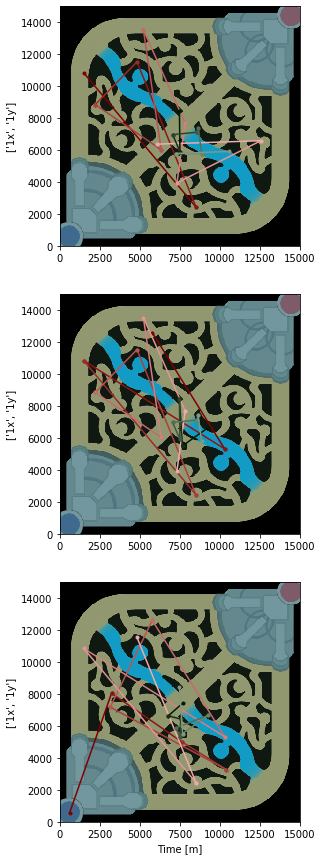

In [48]:
wide_window.plot_map(conv_model,input_width=3,plot_col=["1x","1y"])

In [ ]:
a = [1,2,3]
np.random.shuffle(a)

In [ ]:
len(a)

In [ ]:
a = list( range(3))

In [ ]:
a

In [ ]:
wide_window.train[0][:,:,-2:]